In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

cdict = {'red'  :  ((0., 0., 0.), (0.2, 1., 1.), (0.6, 1., 1.), (1., 0., 0.)),
         'green':  ((0., 0., 0.), (0.2, 0., 0.), (0.6, 1., 1.), (1., 1., 1.)),
         'blue' :  ((0., 0., 0.), (0.2, 0., 0.), (0.6, 0., 0.), (1., 0., 0.))}

my_cmap = colors.LinearSegmentedColormap('my_colormap', cdict, 1024)

In [13]:
data = pd.read_csv('crop_data.csv')
data.sort_values(by='SAMPLE_DATE', inplace=True, ascending=True) # This now sorts in date order
data.head()

,INDEX,PROBE_ID,SAMPLE_DATE,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,X,Y,LOCAL_TIME
10189,78826,18346307,2018-06-01 00:00:00,33.797273,-118.311998,0.0,0.0,FLEET51,378548.653320,3.740452e+06,2018-05-31 17:00:00 -0700
69650,548192,19843587,2018-06-01 00:00:00,33.758240,-118.249032,0.0,0.0,FLEET51,384325.334413,3.736051e+06,2018-05-31 17:00:00 -0700
26713,211747,E44B51E5-6E8E-41EA-AF76-FEAF1C6332C3,2018-06-01 00:00:00,33.804461,-118.081242,6.0,90.0,CONSUMER14,399919.154479,3.741001e+06,2018-05-31 17:00:00 -0700
69653,548206,18323210,2018-06-01 00:00:00,33.807804,-118.282102,88.0,61.0,FLEET51,381330.868727,3.741585e+06,2018-05-31 17:00:00 -0700
30927,244268,780FC5B5-B253-4F07-AEF8-C3DB2848A8D7,2018-06-01 00:00:00,33.810444,-118.078986,271.0,36.0,CONSUMER14,400134.933687,3.741662e+06,2018-05-31 17:00:00 -0700


In [21]:
# data.loc[1:,'LOCAL_TIME'] - 
data.loc[:-1,'LOCAL_TIME']

KeyError: -1

In [4]:
print('unique ID count',len(data.PROBE_DATA_PROVIDER.unique()))
print('unique Probe_ID count',len(data.PROBE_ID.unique()))
print('unique time',len(data.LOCAL_TIME.unique()))
print('raw data shape',data.shape)


unique ID count 21
unique Probe_ID count 23979
unique time 86102
raw data shape (1989370, 11)


In [6]:
t1_series = data[data.LOCAL_TIME == '2018-06-01 16:49:26 -0700' ]
t1_series.head()
print('raw data shape',t1_series.shape)

# t2_series = data[data.LOCAL_TIME.isin'2018-06-01 16:49:26 -0700' ]
# print('raw data shape',t1_series.shape)

raw data shape (40, 11)


In [14]:
ID_series = data[data.PROBE_ID == '24046157' ]
ID_series.head()
print('raw data shape',ID_series.shape)

fleet_series = data[data.PROBE_DATA_PROVIDER == 'FLEET51' ]

print('raw data shape',fleet_series.shape)

raw data shape (148, 11)
raw data shape (357286, 11)


# to set specific regions of interest
intersection_center = data[data['edge_id'].isin(intersection_center_edges)]

In [28]:
def pos_heatmap(data,title):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))

    scatter = ax.scatter(data['X'].values,
                               data['Y'].values)
    scatter_heat = ax.scatter(data['X'].values,
                               data['Y'].values,
                               c=data['SPEED'], s=45, alpha=0.9,cmap=my_cmap)
    cbar = fig.colorbar(scatter_heat)
    cbar.set_label("Speed (m/s)",fontsize=20)
    cbar.ax.tick_params(labelsize=18)
    plt.title(title,fontsize=25)
    plt.axis('off')
    plt.show()   

def route_map(data,title):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))

    scatter = ax.plot(data['X'].values,
                               data['Y'].values)
#     scatter_time = ax.plot(data['X'].values,
#                                data['Y'].values,
#                                c=data.iloc[1:,'LOCAL_TIME'] - data.iloc[:-1,'LOCAL_TIME'], s=45, alpha=0.9,cmap=my_cmap)
#     cbar = fig.colorbar(scatter_heat)
#     cbar.set_label("Speed (m/s)",fontsize=20)
#     cbar.ax.tick_params(labelsize=18)
    plt.title(title,fontsize=25)
    plt.axis('off')
    plt.show() 
    
def mean_speed(data,title):
    plt.figure(figsize = (14,10))
    sns.lineplot(x=data['time'],y=data['speed'])
    plt.title(title,fontsize=25)
    plt.xlabel('Time (s)',fontsize=20)
    plt.ylabel('Mean Speed (m/s)',fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

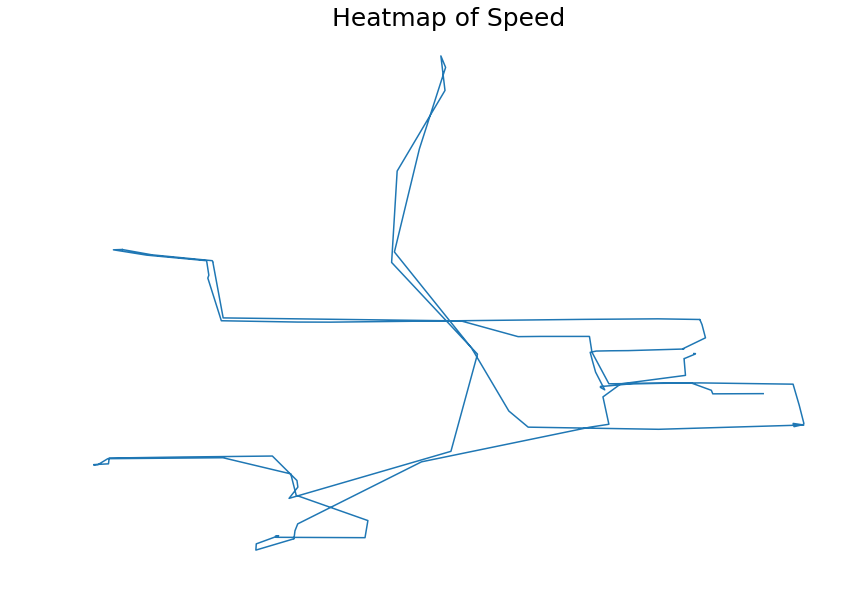

In [29]:
ax = route_map(ID_series,'Heatmap of Speed')

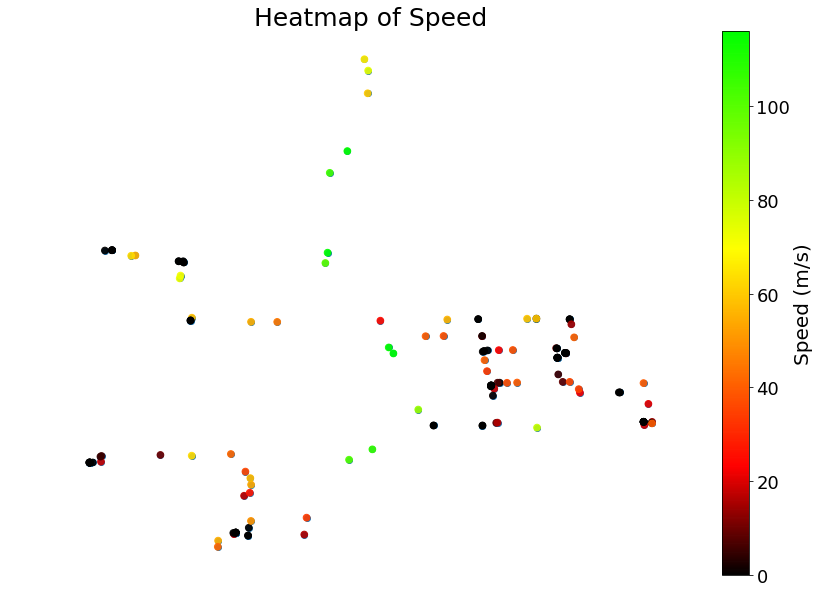

In [16]:
ax = pos_heatmap(ID_series,'Heatmap of Speed')

In [ ]:
#http://polygons.openstreetmap.fr/get_geojson.py?id=396479&params=0
#https://nominatim.openstreetmap.org/details.php?place_id=198792806
import geopandas as gpd
df_places = gpd.read_file('LA.geojson')
df_places.head()
df_places.plot(ax)

In [ ]:
#simulate the trips (statistical applciation)
#estimate how many people are on the beach